In [2]:
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [4]:
import numpy as np

def vector_seq(sequences, dimension=10000):
    results= np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

x_train = vector_seq(train_data)
x_test = vector_seq(test_data)

In [5]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

2022-10-03 17:48:01.617849: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 17:48:02.360150: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2633 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1


In [7]:
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [8]:
#Set aside some data for validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [9]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 38ms/step - loss: 2.2287 - accuracy: 0.5639 - val_loss: 1.4573 - val_accuracy: 0.6860
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.1674 - accuracy: 0.7462 - val_loss: 1.1547 - val_accuracy: 0.7440
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 0.8314 - accuracy: 0.8215 - val_loss: 1.0056 - val_accuracy: 0.7850
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.5967 - accuracy: 0.8775 - val_loss: 0.9165 - val_accuracy: 0.8050
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.4397 - accuracy: 0.9114 - val_loss: 0.8950 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.3318 - accuracy: 0.9297 - val_loss: 0.9773 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.2621 - accuracy: 0.9429 - val_loss: 0.9121 - val_accuracy: 0.8030
Epoch 8/20
16

In [10]:
results = model.evaluate(x_test, y_test)
results

71/71 [==============================] - 0s 4ms/step - loss: 1.2701 - accuracy: 0.7867


[1.2701181173324585, 0.7867319583892822]

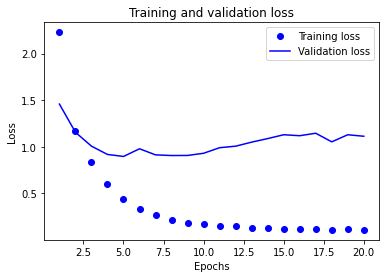

In [11]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

epochs = range(1, len(loss) +1 )

import matplotlib.pyplot as plt

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

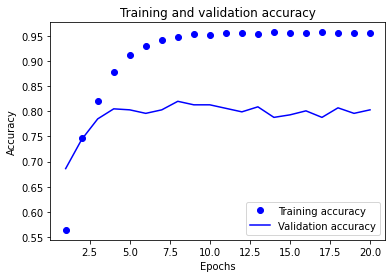

In [12]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Notice overfitting after nine epochs

In [13]:
#Train on only nine epochs
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
    ])

model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

model.fit(x_train,
    y_train,
    epochs=9,
    batch_size=512)
    
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 17ms/step - loss: 2.2011 - accuracy: 0.5246
Epoch 2/9
18/18 [==============================] - 0s 18ms/step - loss: 1.1794 - accuracy: 0.7417
Epoch 3/9
18/18 [==============================] - 0s 19ms/step - loss: 0.8438 - accuracy: 0.8136
Epoch 4/9
18/18 [==============================] - 0s 19ms/step - loss: 0.6058 - accuracy: 0.8685
Epoch 5/9
18/18 [==============================] - 0s 20ms/step - loss: 0.4399 - accuracy: 0.9040
Epoch 6/9
18/18 [==============================] - 0s 19ms/step - loss: 0.3537 - accuracy: 0.9193
Epoch 7/9
18/18 [==============================] - 0s 18ms/step - loss: 0.2569 - accuracy: 0.9426
Epoch 8/9
18/18 [==============================] - 0s 18ms/step - loss: 0.2170 - accuracy: 0.9459
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 1.0921 - accuracy: 0.7970


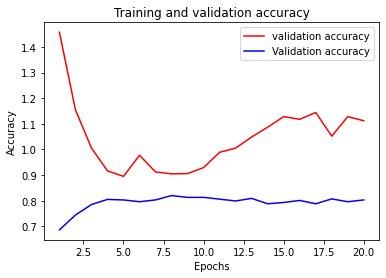

In [14]:
epochs = range(1, len(loss) +1 )

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, val_loss, "r", label="validation accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
prediction = model.predict(x_test)
prediction

71/71 [==============================] - 0s 3ms/step


array([[3.7756294e-05, 3.1200136e-06, 4.2484722e-09, ..., 1.8113897e-06,
        6.8040798e-08, 4.0482508e-08],
       [2.8204029e-02, 6.5549451e-05, 1.9851635e-04, ..., 2.1616226e-05,
        2.2736645e-08, 1.0343058e-03],
       [3.9788917e-02, 5.3157222e-01, 2.7752807e-02, ..., 1.6566139e-04,
        1.0521777e-04, 3.4674892e-04],
       ...,
       [2.3690491e-06, 6.5108325e-06, 1.9586302e-07, ..., 2.6891453e-06,
        3.9415468e-06, 2.7264024e-08],
       [6.3327416e-03, 3.1960938e-02, 9.4309752e-04, ..., 9.7300770e-04,
        3.6444218e-04, 2.3504216e-04],
       [2.9729088e-04, 6.1224657e-01, 1.4576927e-03, ..., 1.2552830e-04,
        7.2993775e-05, 7.9116035e-07]], dtype=float32)